# Data exploration

First I am going to read every file and check what it contains.

In [1]:
import pandas as pd

In [2]:
assessments_df = pd.read_csv('data/assessments.csv')
assessments_df.sort_values(by=['code_presentation']).head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
82,DDD,2013B,25335,TMA,53.0,10.0
134,FFF,2013B,34863,TMA,131.0,25.0
133,FFF,2013B,34862,TMA,89.0,25.0
132,FFF,2013B,34861,TMA,47.0,12.5
131,FFF,2013B,34860,TMA,NaN,12.5


In [3]:
courses_df = pd.read_csv('data/courses.csv')
courses_df.sort_values(by=['code_presentation']).head()

,code_module,code_presentation,module_presentation_length
10,DDD,2013B,240
17,FFF,2013B,240
4,BBB,2013B,240
18,FFF,2014B,241
14,EEE,2014B,241


In [4]:
studentassessment_df = pd.read_csv('data/studentAssessment.csv')
studentassessment_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [5]:
studentinfo_df = pd.read_csv('data/studentInfo.csv')
studentinfo_df.sort_values(by=['id_student']).head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
14394,DDD,2013J,3733,M,South Region,HE Qualification,90-100%,55<=,0,60,N,Withdrawn
383,NaN,NaN,6516,NaN,Scotland,NaN,80-90%,NaN,0,60,N,Pass
14395,DDD,2013J,8462,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn
17560,DDD,2014J,8462,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass


In [6]:
studentregistration = pd.read_csv('data/studentRegistration.csv')
studentregistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


Seems to show which student follows which course.

In [7]:
studentvle_df = pd.read_csv('data/studentVle.csv')
studentvle_df.head(20)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8
6,AAA,2013J,28400,546876,-10,2
7,AAA,2013J,28400,546688,-10,15
8,AAA,2013J,28400,546662,-10,17
9,AAA,2013J,28400,546890,-10,1


In [8]:
vle_df = pd.read_csv('data/vle.csv')
vle_df.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


A lot of the different data files are linked together. So later these can be grouped so we get a more complete file, should it be necesarry.

(All previous lines where made before the dictionary. So there was no explanation yet, but I thought I would keep it here.)

# Null values

Now I am going to check if there are many missing values and if there are fill them in with "Unknown".

It might be better to change these null values to something like the median later to perform calculations but now it is just to make it easier to see which values are missing.

In [9]:
assessments_df.isnull().sum()

code_module            0
code_presentation      0
id_assessment          0
assessment_type        0
date                 114
weight                 0
dtype: int64

In [10]:
assessments_df = assessments_df.fillna(value={"date": "Unknown"})
assessments_df.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [11]:
# Check if it filled
assessments_df.head(1)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,Unknown,10.0


In [12]:
courses_df.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [13]:
studentassessment_df.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [14]:
studentassessment_df[studentassessment_df["score"].isnull()]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


Does score is null equal that they did not take the assessment? Because score = 0 exist so only that would make sense (or maybe sick?).

I am not going to fill the score with unknown because it gives problems with comparing scores later.

I could change the null values to the median or mean but I don't want to alter the data at this point.

In [15]:
# studentassessment_df = studentassessment_df.fillna(value={"score": "Unknown"})
# studentassessment_df.isnull().sum()

In [16]:
studentassessment_df.sort_values("score")

,id_assessment,id_student,date_submitted,is_banked,score
160282,37417,166183,228,0,0.0
89916,25363,656175,40,0,0.0
63371,24298,475734,219,0,0.0
22303,15001,536852,208,0,0.0
49170,24286,2659556,20,0,0.0
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


I wonder if date submitted has an impact on the score. Because people who submit soon might not have put in the same amount of effort as people who submitted later.

In [17]:
studentassessment_df.groupby("date_submitted")["score"].describe().head(50)

,count,mean,std,min,25%,50%,75%,max
date_submitted,,,,,,,,
-11,1.0,63.000000,NaN,63.0,63.00,63.0,63.00,63.0
-10,1.0,85.000000,NaN,85.0,85.00,85.0,85.00,85.0
-9,1.0,75.000000,NaN,75.0,75.00,75.0,75.00,75.0
-8,37.0,88.054054,12.871040,46.0,83.00,94.0,96.00,100.0
-7,4.0,66.750000,10.045729,56.0,59.75,66.5,73.50,78.0
-6,6.0,66.666667,33.571814,1.0,68.25,76.5,85.50,92.0
-5,13.0,67.230769,41.283883,1.0,42.00,88.0,100.00,100.0
-4,12.0,76.000000,36.461686,1.0,75.75,89.5,100.00,100.0
-3,30.0,73.000000,35.032989,1.0,65.25,86.5,99.50,100.0


Date_submitted does not really seem to have an impact of the score, because for most date_submitted the values are very close to each other. 

But later in the notebook I am going to check this more closely.

The date system is weird though because they don't work with regular dates and if you start counting from when the assessment was given it does not make much sense either, because there are negative numbers. It is unclear what this information means.

Because date_submitted is not null it seems weird that the score is null because the assessment was submitted.

In [18]:
studentinfo_df.isnull().sum()

code_module             3446
code_presentation       3446
id_student                 0
gender                  3446
region                     0
highest_education       3446
imd_band                1111
age_band                3446
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

This result is interesting because a same amount of null types appear.
Let's take a closer look at this.

In [19]:
studentinfo_df[studentinfo_df['code_module'].isnull()].sort_values("region")

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1,NaN,NaN,28400,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Pass
20449,NaN,NaN,237934,NaN,Scotland,NaN,80-90%,NaN,0,60,N,Fail
20458,NaN,NaN,267961,NaN,Scotland,NaN,90-100%,NaN,1,60,N,Fail
20459,NaN,NaN,272103,NaN,Scotland,NaN,30-40%,NaN,0,90,Y,Fail
20461,NaN,NaN,278786,NaN,Scotland,NaN,40-50%,NaN,1,135,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...
11116,NaN,NaN,507031,NaN,Scotland,NaN,90-100%,NaN,0,120,N,Withdrawn
11121,NaN,NaN,508637,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Distinction
11126,NaN,NaN,509710,NaN,Scotland,NaN,10-20,NaN,0,30,N,Fail
11129,NaN,NaN,510266,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Fail


Here it is weird that every region that has missing values is Scotland, let's see for sure that this is the case.

In [20]:
studentinfo_df[studentinfo_df["region"] == "Scotland"]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1,NaN,NaN,28400,NaN,Scotland,NaN,20-30%,NaN,0,60,N,Pass
6,NaN,NaN,45462,NaN,Scotland,NaN,30-40%,NaN,0,60,N,Pass
14,NaN,NaN,63400,NaN,Scotland,NaN,40-50%,NaN,0,60,N,Pass
62,NaN,NaN,164259,NaN,Scotland,NaN,70-80%,NaN,0,60,N,Pass
77,NaN,NaN,186149,NaN,Scotland,NaN,30-40%,NaN,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32566,NaN,NaN,2052942,NaN,Scotland,NaN,50-60%,NaN,0,30,N,Pass
32569,NaN,NaN,2214722,NaN,Scotland,NaN,70-80%,NaN,0,30,N,Withdrawn
32571,NaN,NaN,2268380,NaN,Scotland,NaN,20-30%,NaN,0,30,N,Pass
32576,NaN,NaN,2338614,NaN,Scotland,NaN,0-10%,NaN,0,30,Y,Withdrawn


We can see that the output is the same if we look at the student's region and if the student has null values. So if a student's region is Scotland then we have missing data.

Perhaps Scotland has rules regarding data being kept after you finished a course?

In [21]:
studentinfo_df[studentinfo_df.isnull().any(axis=1)].sort_values("region")

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
10140,CCC,2014B,627691,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
12745,CCC,2014J,692933,M,Ireland,HE Qualification,NaN,35-55,0,30,N,Withdrawn
19995,EEE,2013J,586750,M,Ireland,Lower Than A Level,NaN,35-55,0,60,N,Pass
12744,CCC,2014J,692928,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Pass
23264,FFF,2013B,541349,M,Ireland,Lower Than A Level,NaN,35-55,0,120,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
9369,CCC,2014B,551528,M,Yorkshire Region,Lower Than A Level,NaN,0-35,0,120,N,Withdrawn
23927,FFF,2013J,54739,M,Yorkshire Region,Lower Than A Level,NaN,0-35,1,180,N,Withdrawn
23483,FFF,2013B,551528,M,Yorkshire Region,Lower Than A Level,NaN,0-35,0,60,N,Withdrawn
23266,FFF,2013B,541418,M,Yorkshire Region,Lower Than A Level,NaN,0-35,0,60,N,Pass


But there are also some students with missing values that don't live in Scotland. All these missing values seem to belong to imd_band. Which does not seem that weird because maybe they don't wan't to share that information.
But this is also unclear, the data could just be missing.

In [22]:
studentinfo_df = studentinfo_df.fillna(value={"code_module": "Unknown", "code_presentation": "Unknown", "gender": "Unknown", "highest_education": "Unknown", "age_band": "Unknown", "imd_band": "Unknown"})
studentinfo_df.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [23]:
studentvle_df.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [24]:
vle_df.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [25]:
vle_df[vle_df.isnull().any(axis=1)]

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [26]:
vle_df.sort_values(["week_from", "week_to"])

,id_site,code_module,code_presentation,activity_type,week_from,week_to
3270,773452,DDD,2014B,url,0.0,0.0
3647,813933,DDD,2014J,oucontent,0.0,0.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


Most of the week_from and week_to values seem te be missing, this has probably to do with the fact that the material is just always available or that they don't have a specific time planned for them.

In [27]:
vle_df = vle_df.fillna(value={"week_from": "Unknown", "week_to": "Unknown"})
vle_df.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

# Looking closer at some data

Here I want to check some relations between data sets.
I would look to see if we can check how many students are enrolled in a course and how many assessments a course has.

First let's see how many students are enrolled in a course that has a presentation.

In [28]:
students_course_df = studentregistration.merge(courses_df, how='inner', on='code_module')
sc_grouped_df = students_course_df.groupby(["code_module", "code_presentation_x"], as_index=False).count()[["code_module", "code_presentation_x", "id_student"]]
sc_grouped_df = sc_grouped_df.rename(columns={"id_student": "student_count"})
sc_grouped_df

,code_module,code_presentation_x,student_count
0,AAA,2013J,766
1,AAA,2014J,730
2,BBB,2013B,7068
3,BBB,2013J,8948
4,BBB,2014B,6452
5,BBB,2014J,9168
6,CCC,2014B,3872
7,CCC,2014J,4996
8,DDD,2013B,5212
9,DDD,2013J,7752


If we only group by code module we would get duplicates and that something we don't want so we are going to look at the data this way.

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='code_module', ylabel='student_count'>

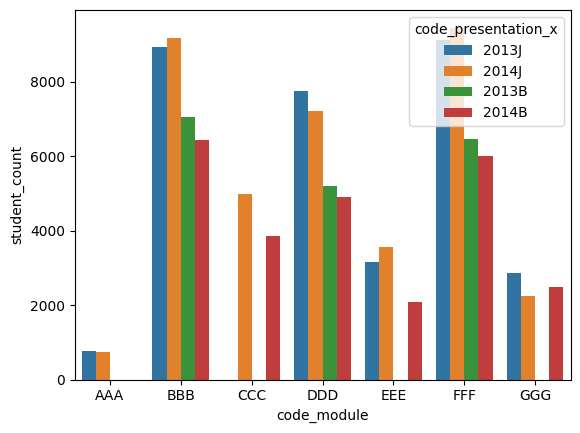

In [30]:
sns.barplot(data=sc_grouped_df, x="code_module", y="student_count", hue="code_presentation_x")

Now we also have a visual of the amount of students. It is interesting that the amount of students drop with each presentation.

Now let's see if we can find how many assessments each course has.

In [31]:
courses_df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2113J,268
1,AAA,2014J,269
2,BBB,2113J,268
3,BBB,2014J,262
4,BBB,2013B,240


First we will start by just getting the code modules so we don't have duplicates. We won't look at the presentations.

In [32]:
modules_df = pd.DataFrame(courses_df['code_module'].drop_duplicates())
modules_df

,code_module
0,AAA
2,BBB
6,CCC
8,DDD
12,EEE
15,FFF
19,GGG


Now that we only have the modules we will merge it with the assessments dataframe.

In [33]:
module_assessments = modules_df.merge(assessments_df, how="inner", on="code_module")
module_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,Unknown,10.0
1,AAA,2013J,1753,TMA,Unknown,20.0
2,AAA,2013J,1754,TMA,Unknown,20.0
3,AAA,2013J,1755,TMA,Unknown,20.0
4,AAA,2013J,1756,TMA,Unknown,30.0


Now we just need to group them together.

In [34]:
assessment_count_df = module_assessments.groupby("code_module", as_index=False).count()[["code_module", "id_assessment"]].rename(columns={"id_assessment": "assessment_count"})
assessment_count_df

,code_module,assessment_count
0,AAA,12
1,BBB,42
2,CCC,20
3,DDD,35
4,EEE,15
5,FFF,52
6,GGG,30


Now just to show it I am gonna put in a bar plot to visualize.

<AxesSubplot:xlabel='code_module', ylabel='assessment_count'>

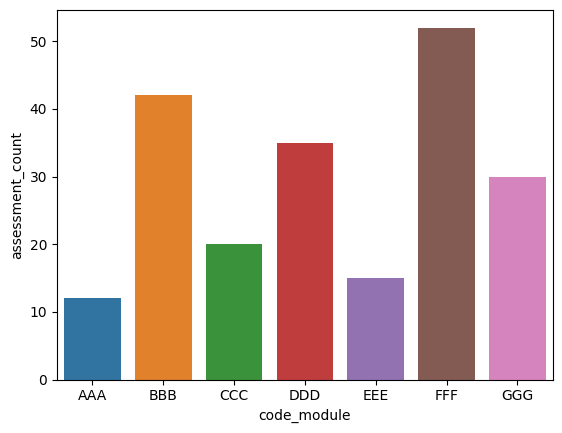

In [35]:
sns.barplot(data=assessment_count_df, x="code_module", y="assessment_count")

# Possible connection

A possible intersting connection between data could be that students that used the vle have a higher succes rate than student that don't so let's take a look at that.

In [36]:
studentvle_count = studentvle_df.groupby(["id_student", "code_module"], as_index=False).sum()
studentvle_count.sort_values(["sum_click", "id_student"])

,id_student,code_module,id_site,date,sum_click
372,75309,DDD,772705,-13,1
561,102849,BBB,542864,-4,1
999,146089,DDD,547303,62,1
1268,174468,FFF,716238,-3,1
1953,258402,BBB,542864,-7,1
...,...,...,...,...,...
3562,368315,FFF,1692891385,212510,19734
17164,611417,CCC,1754417679,265593,20391
7421,517269,FFF,1621976161,315766,21123
4921,434476,FFF,2989125021,397226,21204


Now I have the sum of clicks that each student has for each code_module. Now let's combine vle and assessment.

In [37]:
student_vle_assessment_df = studentvle_count.merge(studentassessment_df, how="inner", on="id_student")[["id_student", "code_module", "id_assessment", "score", "sum_click"]]
student_vle_assessment_df.sort_values("sum_click")

,id_student,code_module,id_assessment,score,sum_click
167462,684498,EEE,24296,67.0,1
170480,689107,BBB,15020,100.0,1
97242,585526,CCC,25365,76.0,1
167458,684498,EEE,24292,29.0,1
167459,684498,EEE,24293,37.0,1
...,...,...,...,...,...
2813,80868,CCC,25352,70.0,24139
2814,80868,CCC,25353,74.0,24139
2815,80868,CCC,25354,58.0,24139
2808,80868,CCC,24299,70.0,24139


This table should now only have the students that used the vle so now we are going to look at some of the statistics of this group.

In [38]:
student_vle_assessment_df["score"].describe()

count    196373.000000
mean         75.739058
std          18.925063
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

I also want to see how it looks like compared to the click sum. So we are going to import seaborn to display it in a graph.

Because we would get a very large and mostly unreadable graph should we just keep the sum_click. I am going to make a new column with every sum_click rounded to the nearest 100th value. Otherwise we would get following graph

In [39]:
# This takes a while to run so I just saved the image seperately
# sns.lineplot(data = student_vle_assessment_df, x = "sum_click", y = "score")

<img src="x=clicks,y=score.png"/>

In [40]:
student_vle_assessment_df["rounded_clicks"] = round(student_vle_assessment_df["sum_click"], -2)
student_vle_assessment_df.sort_values("rounded_clicks")

,id_student,code_module,id_assessment,score,sum_click,rounded_clicks
100544,588528,GGG,37415,70.0,44,0
56580,530112,BBB,15000,65.0,3,0
56579,530112,BBB,14999,72.0,3,0
56578,530112,BBB,14998,75.0,3,0
56577,530112,BBB,14997,74.0,3,0
...,...,...,...,...,...,...
2811,80868,CCC,25350,84.0,24139,24100
2812,80868,CCC,25351,87.0,24139,24100
2813,80868,CCC,25352,70.0,24139,24100
2806,80868,CCC,24297,97.0,24139,24100


<AxesSubplot:xlabel='rounded_clicks', ylabel='score'>

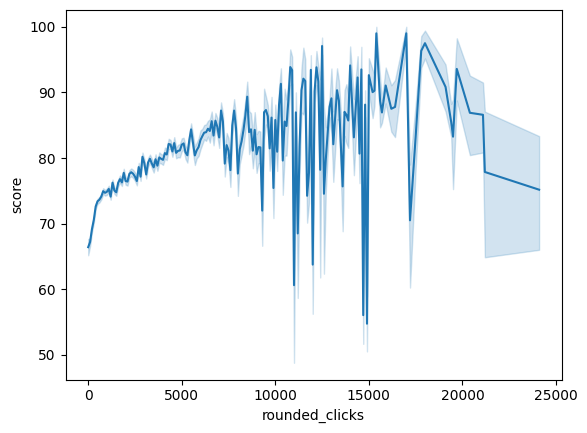

In [41]:
sns.lineplot(data = student_vle_assessment_df, x = "rounded_clicks", y = "score")

This graph gives us a bit of information. We can clearly see that the score goes up the more clicks the student has, up until around 17k-18k clicks and then it goes down again. There are also some major low scores between 10k and 15k clicks.
This is interesting because you can clearly see that more clicks result in higher scores but it is not the case for every student.

I would say that there is a relation between the amount of clicks in the vle and the score the student gets, but more clicks does not necessarily result in higher scores. (Maybe students autocompleted tasks or just copied them?)

# Look closer at date submitted

Now I want to go deeper in to the relation between date submitted and score.

Let's make a column that rounds date submitted to the nearest 10th number.

In [42]:
studentassessment_df["date_submitted_rounded"] = 10 * round(studentassessment_df["date_submitted"] / 10)
studentassessment_df

,id_assessment,id_student,date_submitted,is_banked,score,date_submitted_rounded
0,1752,11391,18,0,78.0,20.0
1,1752,28400,22,0,70.0,20.0
2,1752,31604,17,0,72.0,20.0
3,1752,32885,26,0,69.0,30.0
4,1752,38053,19,0,79.0,20.0
...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,230.0
173908,37443,534672,229,0,100.0,230.0
173909,37443,546286,215,0,80.0,220.0
173910,37443,546724,230,0,100.0,230.0


Let's group by this rounded date and look at the scores.

In [43]:
studentassessment_df.groupby("date_submitted_rounded")["score"].describe()

,count,mean,std,min,25%,50%,75%,max
date_submitted_rounded,,,,,,,,
-10.0,50.0,82.960000,18.054295,1.0,76.25,87.0,95.00,100.0
-0.0,2599.0,73.874952,22.604222,0.0,64.00,78.0,90.00,100.0
10.0,2931.0,75.244626,22.685591,0.0,68.00,80.0,90.00,100.0
20.0,19106.0,73.627080,20.959889,0.0,65.00,78.0,88.00,100.0
30.0,5601.0,79.917158,18.053955,0.0,71.00,86.0,93.00,100.0
40.0,5379.0,77.222904,15.075795,0.0,70.00,80.0,88.00,100.0
50.0,13906.0,75.558248,16.571259,0.0,66.00,78.0,88.00,100.0
60.0,7012.0,80.963063,18.006581,0.0,70.00,82.0,100.00,100.0
70.0,5901.0,79.622098,17.841436,0.0,71.00,84.0,93.00,100.0


On first glance it does not seem like there is a relation between them, but let's put it in a graph to see for sure.

<AxesSubplot:xlabel='date_submitted_rounded', ylabel='score'>

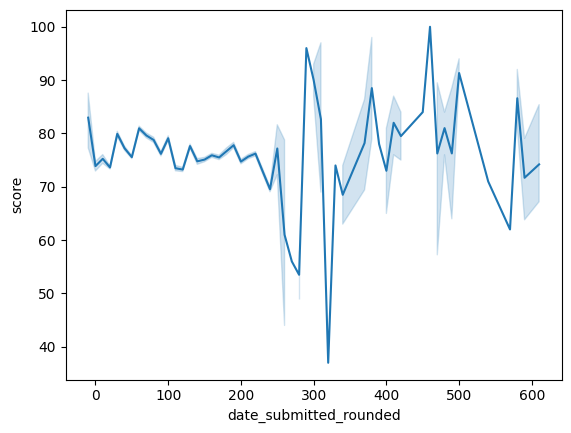

In [44]:
sns.lineplot(data = studentassessment_df, x = "date_submitted_rounded", y = "score")

Just to see what the result would be I am going to round to the nearest 50th number.

In [45]:
studentassessment_df["date_submitted_rounded_50"] = 50 * round(studentassessment_df["date_submitted"] / 50)
studentassessment_df.head()

,id_assessment,id_student,date_submitted,is_banked,score,date_submitted_rounded,date_submitted_rounded_50
0,1752,11391,18,0,78.0,20.0,0.0
1,1752,28400,22,0,70.0,20.0,0.0
2,1752,31604,17,0,72.0,20.0,0.0
3,1752,32885,26,0,69.0,30.0,50.0
4,1752,38053,19,0,79.0,20.0,0.0


<AxesSubplot:xlabel='date_submitted_rounded_50', ylabel='score'>

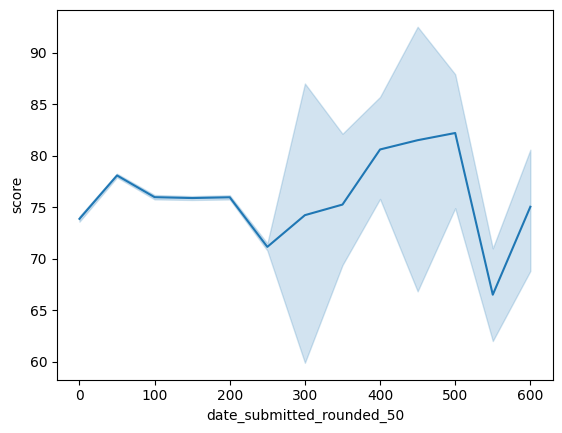

In [46]:
sns.lineplot(data = studentassessment_df, x = "date_submitted_rounded_50", y = "score")

It does seem like date submitted has no real relationship with the score. (Perhaps I just don't understand the meaning of the date column.) There are higher score with a later submit date but the highest scores can also be found when the date is later.

I think I misunderstand what date submitted means so it is unclear if this is important.

# Relation between attempts and pass

A possible relation could be between number of attempts and wether they pass or not. If you take a course multiple times, it would make sense that you pass or give up. So let's find that out.

In [47]:
studentinfo_df.sort_values("num_of_prev_attempts")

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
21041,EEE,2014B,634817,M,North Region,Lower Than A Level,80-90%,0-35,0,60,N,Pass
21040,Unknown,Unknown,634744,Unknown,Scotland,Unknown,Unknown,Unknown,0,60,N,Fail
21039,EEE,2014B,634737,M,Yorkshire Region,Lower Than A Level,20-30%,0-35,0,90,N,Fail
21038,Unknown,Unknown,634600,Unknown,Scotland,Unknown,0-10%,Unknown,0,30,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
19277,DDD,2014J,2338290,M,East Anglian Region,A Level or Equivalent,80-90%,0-35,5,60,N,Pass
16440,DDD,2014B,286449,F,East Midlands Region,Lower Than A Level,40-50%,0-35,6,120,N,Fail
30035,FFF,2014J,2630284,F,East Midlands Region,A Level or Equivalent,0-10%,35-55,6,90,N,Withdrawn
4903,BBB,2014B,334981,F,South Region,A Level or Equivalent,70-80%,35-55,6,120,N,Distinction


The easiest way to see this is just to put it in a graph.

In [48]:
attempts_result_df = studentinfo_df[["num_of_prev_attempts", "final_result", "id_student"]].groupby(["num_of_prev_attempts", "final_result"], as_index=False).count()
attempts_result_df = attempts_result_df.rename(columns={"id_student": "count"})
attempts_result_df.head()

,num_of_prev_attempts,final_result,count
0,0,Distinction,2857
1,0,Fail,5731
2,0,Pass,11148
3,0,Withdrawn,8685
4,1,Distinction,143


<AxesSubplot:xlabel='num_of_prev_attempts', ylabel='count'>

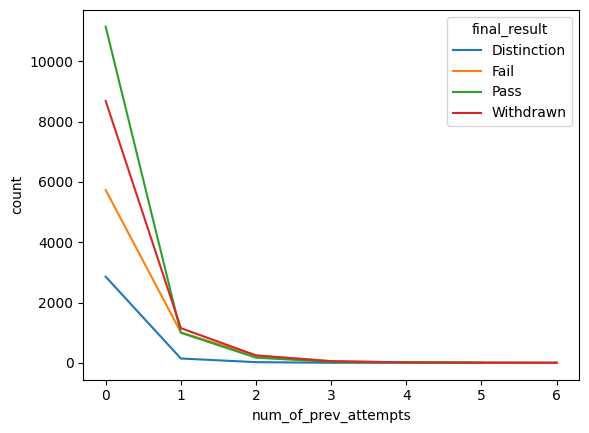

In [49]:
sns.lineplot(data = attempts_result_df, x = "num_of_prev_attempts", y = "count", hue="final_result")

We can definitly see a relation here, but it is not unexpected. Wether they fail, pass ... seems to be higher if they haven't done the course yet. But later years the amount of people that pass, fail or withdraw are basically the same.

We did learn here that most people pass the course and that more people withdraw than fail, which is something that I did not expect.

We can also clearly see that most people pass the course first try, which of course makes sense since passing grades are usually higher than 50%.